In [1]:
import time

import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from copy import deepcopy
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision.transforms as T

from collections import deque
import random
import datetime
import os
from atari_wrappers import wrap_dqn
from Agent import Agent

from IPython import display
plt.ion()
import time

In [2]:
use_gpu = torch.cuda.is_available()
print('Use GPU: {}'.format(use_gpu))

Use GPU: True


In [3]:
agent = Agent(skip=True,episodic=True)
#agent.load_model('/scratch/ab8084/atari/saved/final_model_breakout.pth')

In [4]:
agent.benchmark

74.0

In [4]:
agent.train(replay_buffer_fill_len=50000, 
            batch_size=32, 
            episodes=10**6,
            stop_reward=1900,
            max_epsilon_steps=100000,
            epsilon_start=1,
            epsilon_final=0.05,
            sync_target_net_freq=10000)

Start training at: Tue May  7 15:14:47 2019
Populating Replay Buffer


Replay Buffer populated with 50000 transitions, starting training...


synchronizing target network...
global step: 42  | episode: 1  | episode_length: 42  | episode reward: 3.0
global step: 2739  | episode: 252  | episode_length: 46  | episode reward: 4.0
synchronizing target network...
global step: 10697  | episode: 1000  | mean episode_length: 10.697  | mean episode reward: 0.34
synchronizing target network...
global step: 21933  | episode: 2000  | mean episode_length: 11.236  | mean episode reward: 0.344
synchronizing target network...
global step: 33304  | episode: 3000  | mean episode_length: 11.371  | mean episode reward: 0.385
global step: 34814  | episode: 3115  | episode_length: 52  | episode reward: 5.0
synchronizing target network...
global step: 46952  | episode: 4000  | mean episode_length: 13.648  | mean episode reward: 0.453
synchronizing target network...
global step: 59632  | episode: 4971  | episo

synchronizing target network...
global step: 1367998  | episode: 26000  | mean episode_length: 87.843  | mean episode reward: 5.128
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
global step: 1424900  | episode: 26779  | episode_length: 186  | episode reward: 23.0
synchronizing target network...
synchronizing target network...
global step: 1441846  | episode: 27000  | mean episode_length: 73.848  | mean episode reward: 5.287
synchronizing target network...
synchronizing target network...
synchronizing target network...
global step: 1476350  | episode: 27436  | episode_length: 222  | episode reward: 24.0
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
global step: 1516518  | episode: 28000  | mean episode_length: 74.672  | mean episode reward: 5.328
synchronizing ta

synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
global step: 3115964  | episode: 48761  | episode_length: 225  | episode reward: 29.0
synchronizing target network...
global step: 3127171  | episode: 48915  | episode_length: 99  | episode reward: 31.0
synchronizing target network...
global step: 3132302  | episode: 49000  | mean episode_length: 69.167  | mean episode reward: 5.567
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
global step: 3210307  | episode: 50000  | mean episode_length: 78.005  | mean episode reward: 5.699
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target 

synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
global step: 4928801  | episode: 72000  | mean episode_length: 87.913  | mean episode reward: 5.958
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
global step: 4995974  | episode: 72853  | episode_length: 280  | episode reward: 39.0
synchronizing target network...
synchronizing target network...
global step: 5010865  | episode: 73000  | mean episode_length: 82.064  | mean episode reward: 5.888
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchroniz

synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
global step: 6720792  | episode: 95000  | mean episode_length: 83.058  | mean episode reward: 6.127
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
global step: 6810875  | episode: 96000  | mean episode_length: 90.083  | mean episode reward: 5.998
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...


synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
global step: 8494007  | episode: 119000  | mean episode_length: 70.805  | mean episode reward: 5.936
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
global step: 8560540  | episode: 120000  | mean episode_length: 66.533  | mean episode reward: 5.971
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
synchronizing target network...
global step: 8631715  | episode: 121000  | mean episode_length: 71.175  | mean episode reward: 6.271
synchronizing target network...
synchronizing target network...
synchronizing target netw

KeyboardInterrupt: 

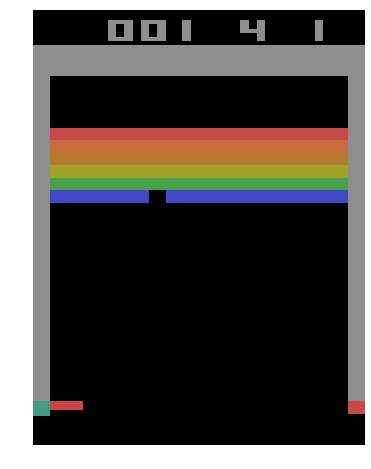

In [5]:
with torch.no_grad():
    for i in range(1):
        done=False
        agent=Agent(skip=False,episodic=True)
        #agent.load_model('/scratch/ab8084/atari/saved/final_model_boxing.pth')
        #agent.env = gym.wrappers.Monitor(agent.env, "recording")
        plt.figure(figsize=(10,8))
        state=agent.env.reset()
        #print(state.shape)
        plt.imshow(agent.env.render(mode='rgb_array'))
        plt.axis('off')
        plt.show()
        while not done:
            action = agent.select_action(state, 0)
            state, reward, done, _ = agent.env.step(action)
            display.clear_output(wait=True)
            plt.figure(figsize=(10,8))
            plt.imshow(agent.env.render(mode='rgb_array'))
            plt.axis('off')
            plt.show()
            #time.sleep(0.1)

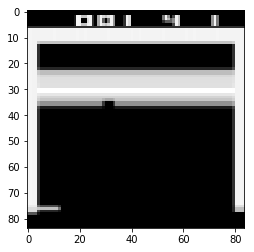

In [6]:
plt.imshow(np.array(state)[3],cmap='gray')

In [13]:
np.array(state).shape

(4, 84, 84)